In [ ]:
pip install gillespy2

In [ ]:
pip install --upgrade pip

In [ ]:
pip install pandas

In [9]:
import gillespy2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**My model**

In [59]:
def switching_process(paramateres_value=None):
    model = gillespy2.Model(name="switching_process")
    # Parameters
    alpha_minus = gillespy2.Parameter(name='alpha_minus', expression=10.0)
    beta_minus = gillespy2.Parameter(name='beta_minus', expression=0.0)
    alpha_plus = gillespy2.Parameter(name='alpha_plus', expression=15.0)
    beta_plus = gillespy2.Parameter(name='beta_plus', expression=0.0)
    switch_minus = gillespy2.Parameter(name='switch_minus', expression=0.0)
    switch_plus = gillespy2.Parameter(name='switch_plus', expression=0.0)
    model.add_parameter([alpha_minus, beta_minus, alpha_plus, beta_plus, switch_minus, switch_plus])
    # Species
    z_minus = gillespy2.Species(name='z_minus', initial_value=1)
    z_plus = gillespy2.Species(name='z_plus', initial_value=1)
    model.add_species([z_minus, z_plus])
    # Reactions
    birth_minus = gillespy2.Reaction(name="birth_minus", reactants={z_minus: 1}, products={z_minus: 2}, rate=alpha_minus) 
    death_minus = gillespy2.Reaction(name="death_minus", reactants={z_minus: 1}, products={}, rate=beta_minus)
    birth_plus = gillespy2.Reaction(name="birth_plus", reactants={z_plus: 1}, products={z_plus: 2}, rate=alpha_plus) 
    death_plus = gillespy2.Reaction(name="death_plus", reactants={z_plus: 1}, products={}, rate=beta_plus)
    switch_to_minus = gillespy2.Reaction(name="switch_to_minus", reactants={z_plus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_minus)
    switch_to_plus = gillespy2.Reaction(name="switch_to_plus", reactants={z_minus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_plus)
    model.add_reaction([birth_minus, death_minus, birth_plus, death_plus, switch_to_minus, switch_to_plus])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=1.2, num_points=121)
    model.timespan(tspan)
    return model

In [60]:
switching_model = switching_process()

In [61]:
%time switching_results = switching_model.run(number_of_trajectories=10)

CPU times: user 6.73 ms, sys: 15.2 ms, total: 22 ms
Wall time: 1min 19s


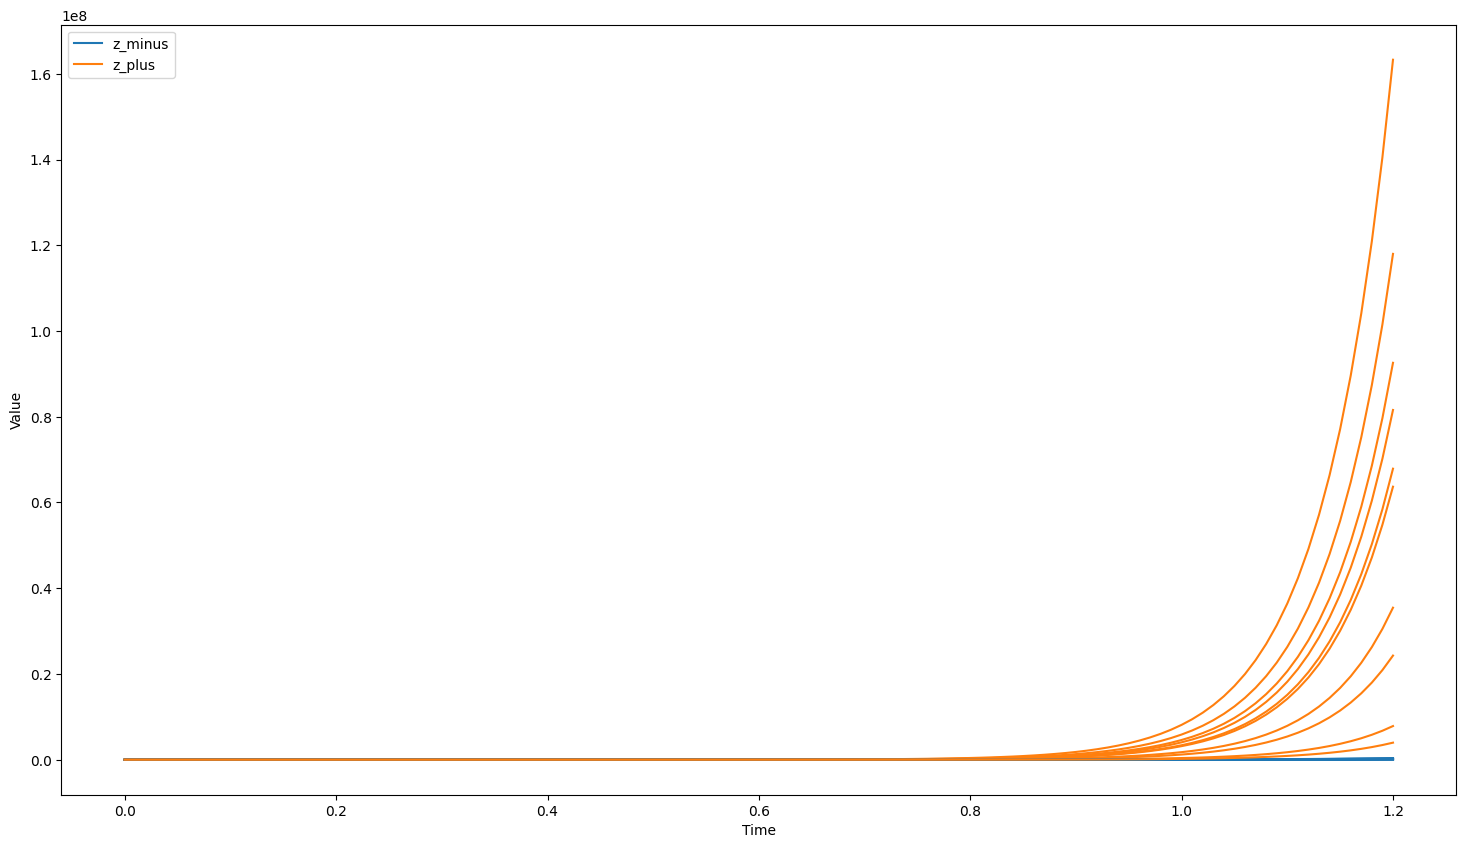

In [62]:
switching_results.plot()

In [63]:
results_avg = switching_results.average_ensemble() 
results_stddev = switching_results.stddev_ensemble()

In [70]:
type(np.array(results_avg['z_minus']))

numpy.ndarray

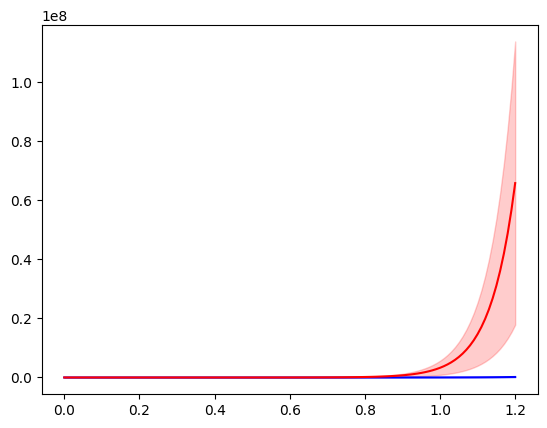

In [64]:
plt.plot(results_avg['time'],results_avg['z_minus'], '-', color = 'blue')
plt.plot(results_avg['time'],results_avg['z_plus'], '-', color = 'red')
plt.fill_between(results_avg['time'], np.array(results_avg['z_minus']) - np.array(results_stddev['z_minus']), np.array(results_avg['z_minus']) + np.array(results_stddev['z_minus']), color = 'blue', alpha = 0.2)
plt.fill_between(results_avg['time'], np.array(results_avg['z_plus']) - np.array(results_stddev['z_plus']), np.array(results_avg['z_plus']) + np.array(results_stddev['z_plus']), color = 'red', alpha = 0.2)

In [ ]:
print(results_stddev['z_minus'])
print(results_avg['z_minus'])
np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus'])

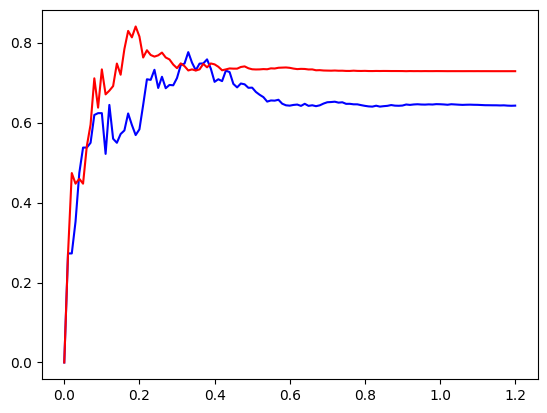

In [65]:
plt.plot(results_avg['time'],np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus']), color = 'blue')
plt.plot(results_avg['time'],np.array(results_stddev['z_plus'])/np.array(results_avg['z_plus']), color = 'red')

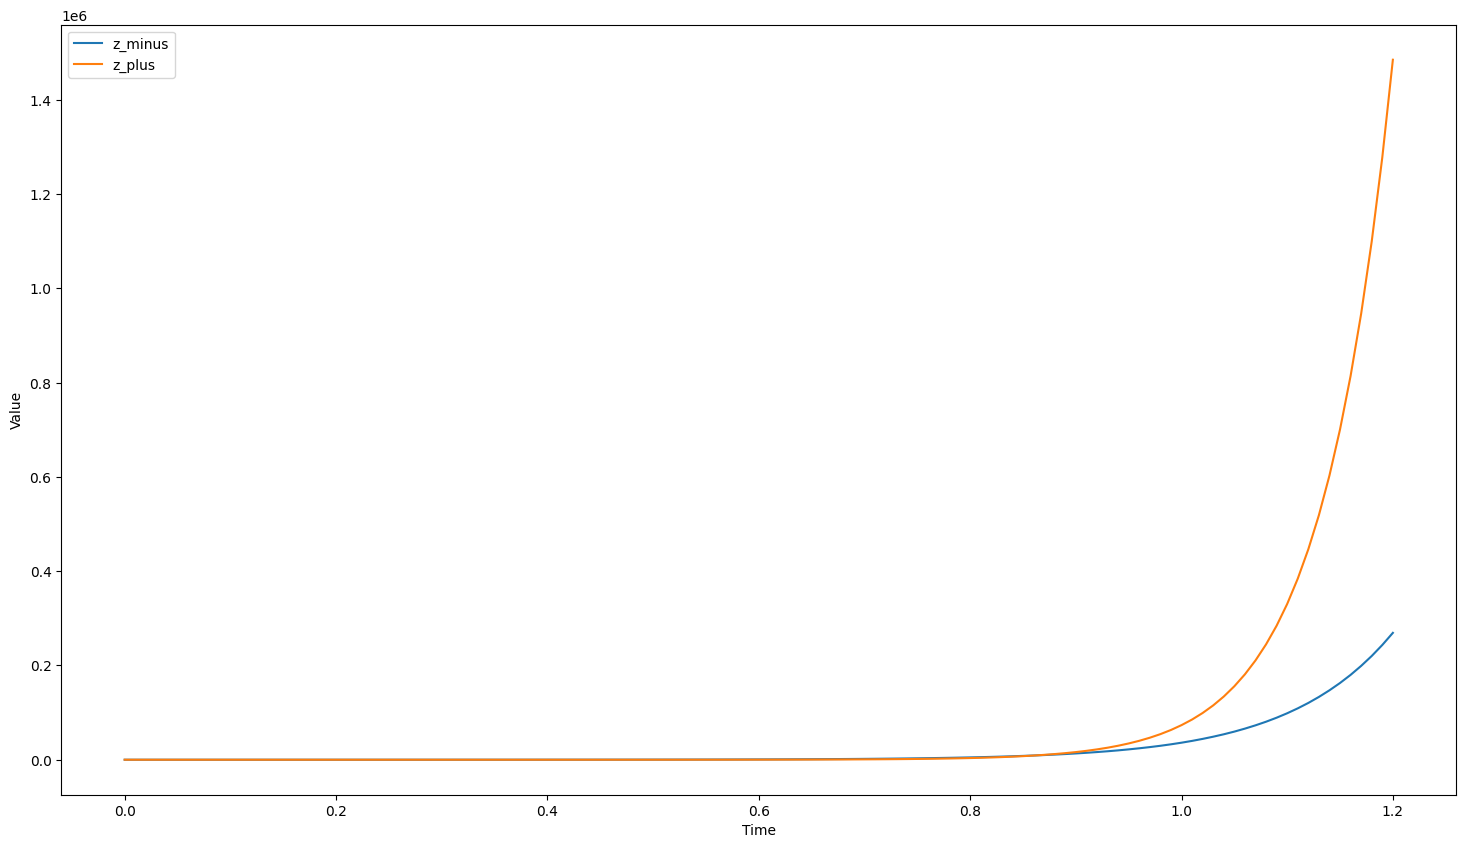

In [54]:
results_avg.plot()

In [32]:
type(trajectory)

gillespy2.core.results.Trajectory

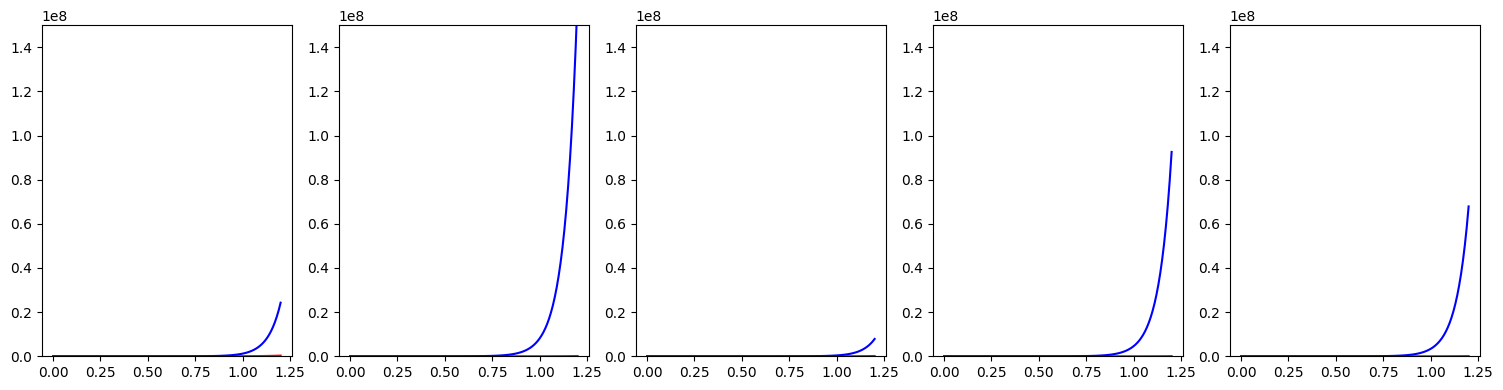

In [66]:
fig,axs = plt.subplots(1,5, figsize=(15,4))
for i in range(0,5):
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_minus'], 'r')
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_plus'], 'b')
        axs[i].set_ylim(0,1.5e8)
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

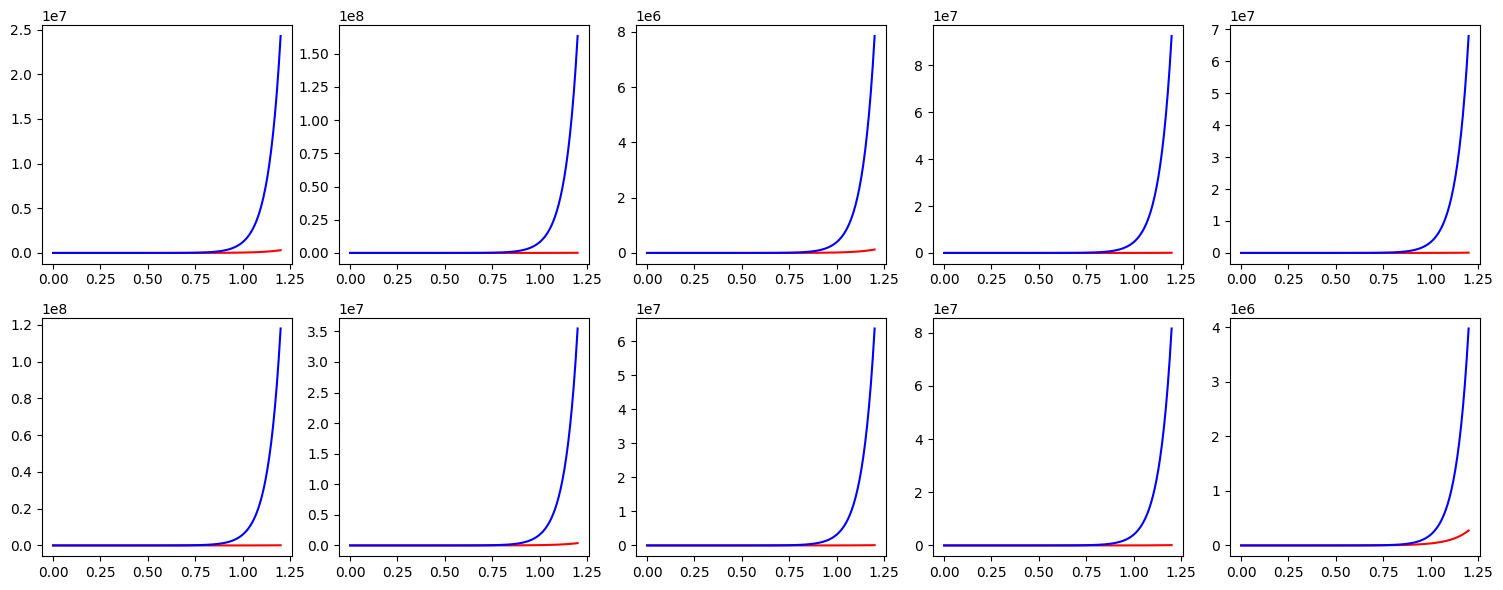

In [67]:
fig,axs = plt.subplots(2,5, figsize=(15,6))
for j in range(0,2):
    for i in range(0,5):
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_minus'], 'r')
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_plus'], 'b')
        #axs[j,i].set_ylim(0,8e7)
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

In [68]:
for i in range(0,10):
    df = pd.DataFrame(switching_results.to_array()[i], columns=['time', 'z_minus', 'z_plus'])
    df.to_csv('./Gillespy2/10_15_00/switching_results_{}.csv'.format(i))

In [42]:
i = 60
df.to_csv('./Gillespy2/15_10_01/1.2/switching_results_{}.csv'.format(i))

In [8]:
print(df)

     time    z_minus  z_plus
0    0.00        1.0     0.0
1    0.01        1.0     0.0
2    0.02        1.0     0.0
3    0.03        1.0     0.0
4    0.04        1.0     0.0
..    ...        ...     ...
96   0.96  2249673.0  4775.0
97   0.97  2614334.0  5547.0
98   0.98  3035863.0  6435.0
99   0.99  3527752.0  7415.0
100  1.00  4100070.0  8623.0

[101 rows x 3 columns]
